In [1]:
import sys
sys.path.append("..")

import time
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import utils_library.visualization.visualizations as vis
import applications.model_wrapper
import utils_library.post_processing.post as post
import utils_library.configs.draw_config as draw_config
import utils_library.configs.post_config as post_config
import utils_library.configs.keypoints_config as kpts_config
import utils_library.configs.default_config as def_config

post.Skeletonizer.config(kpts_config.KEYPOINTS_DEF, kpts_config.JOINTS_DEF, post_config)
post.Skeleton.config(kpts_config.KEYPOINTS_DEF, kpts_config.JOINTS_DEF)


In [2]:
def preprocess_img(img):
    """
    This function implements the preprocessing of input image.
    Input original img, it will:
    1. add newaxis to first dimension
    2. fix image height to 368 and proportionally resize image width
    3. normalize to 0...1 by dividing 255
    """
    inHeight = img.shape[0]
    inWidth = img.shape[1]
    frameHeight = 368
    frameWidth = round(frameHeight/inHeight * inWidth)
    
    input_img = tf.image.resize(img, (frameHeight, frameWidth))
    input_img = tf.image.convert_image_dtype(input_img, dtype=tf.float32)
    
    input_img /= 255
    input_img = input_img[tf.newaxis, ...]

    return input_img

In [3]:
## configs
#model_path = "./tmp/models/test_mobilenet_model29Mon0321-1820/"
model_path = "./trained_models/mobilenet_model_COCO/"
#img_path = "./self_dataset/imgs/left/left_Explorer_HD720_SN15385_19-30-22.png"
img_path = "/Users/alextrasza/Desktop/000000002340.jpg"

# COCO Output Format
keypointsMapping = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

In [4]:
# loading model and check architecture
model = tf.keras.models.load_model(model_path)

In [5]:
# loading images and do preprocessing
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
input_img = preprocess_img(img_rgb)

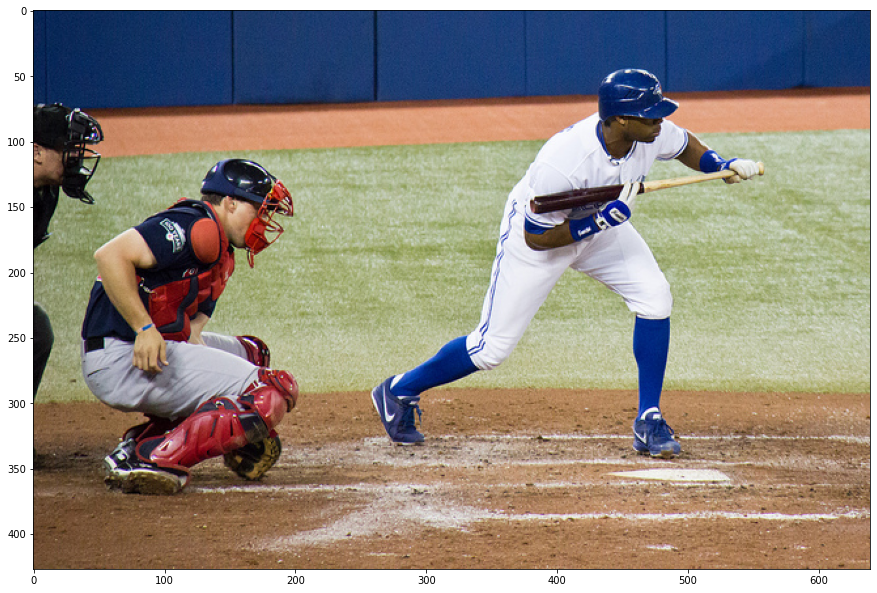

In [6]:
plt.figure(figsize=[15,15])
plt.imshow(img_rgb)

In [7]:
start_time = time.time()
pafs, kpts = model.predict(input_img)
end_time = time.time()
model_time = end_time - start_time

start_time = time.time()
skeletonizer = post.Skeletonizer(kpts[0], pafs[0])
skeletons = skeletonizer.create_skeletons()
end_time = time.time()
post_time = end_time - start_time

In [8]:
print("Model time usage: ", model_time)
print("Post time usage: ", post_time)

Model time usage:  2.5716450214385986
Post time usage:  0.016199111938476562


In [9]:
skeleton_drawer = vis.SkeletonDrawer(img_rgb, draw_config)
for skeleton in skeletons:
    skeleton.draw_skeleton(skeleton_drawer.joint_draw, skeleton_drawer.kpt_draw)

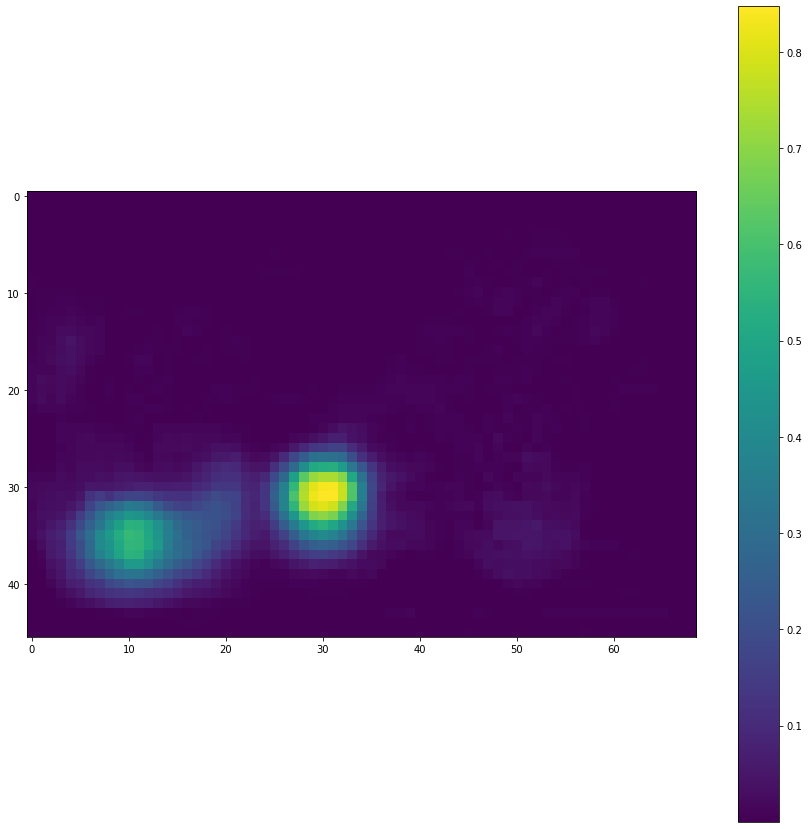

In [13]:
plt.figure(figsize=[15,15])
single_paf = kpts[0,...,7]
#single_paf = cv2.resize(single_paf, dsize=(1526,734))
plt.imshow(abs(single_paf))
plt.colorbar()

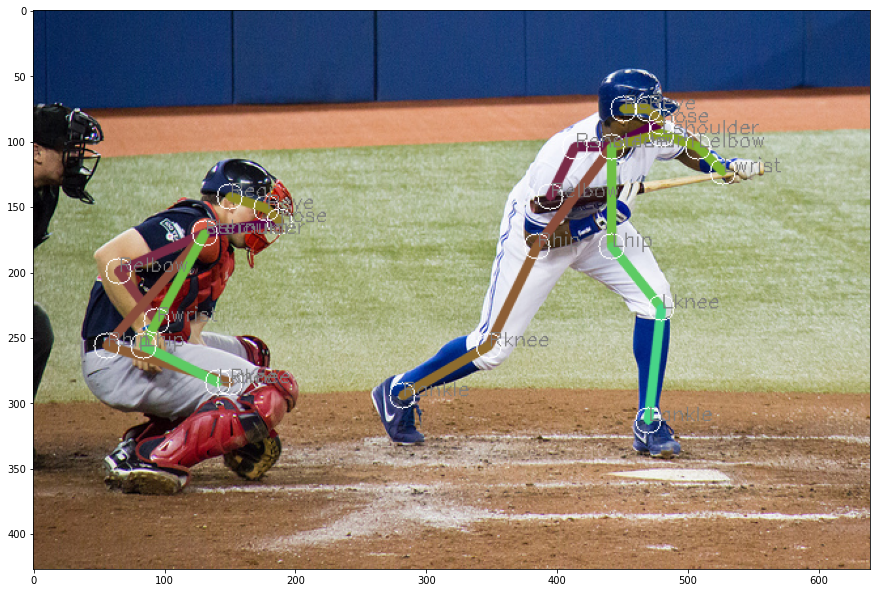

In [11]:
plt.figure(figsize=[15,15])
plt.imshow(img_rgb)